## Deep autoencoder

We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Data
# Let's prepare our input data. We're using MNIST digits, and we're discarding the labels 
# (since we're only interested in encoding/decoding the input images).
(x_train, _), (x_test, _) = mnist.load_data()

# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.3255 - val_loss: 0.2638
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2581 - val_loss: 0.2541
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2449 - val_loss: 0.2349
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2237 - val_loss: 0.2130
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2076 - val_loss: 0.1993
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1932 - val_loss: 0.1896
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1848 - val_loss: 0.1795
Epoch 8/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1794 - val_loss: 0.1747
Epoch 9/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1749 - val_loss: 0.1

60000/60000 [==============================] - 1s 17us/step - loss: 0.1038 - val_loss: 0.1025
Epoch 78/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1036 - val_loss: 0.1005
Epoch 79/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1033 - val_loss: 0.1013
Epoch 80/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1031 - val_loss: 0.1019
Epoch 81/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1029 - val_loss: 0.1009
Epoch 82/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1027 - val_loss: 0.1038
Epoch 83/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1026 - val_loss: 0.1019
Epoch 84/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1023 - val_loss: 0.1023
Epoch 85/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1020 - val_loss: 0.1014
Epoch 86/100
60000/60000 [========================

In [16]:
len(autoencoder.layers)

7

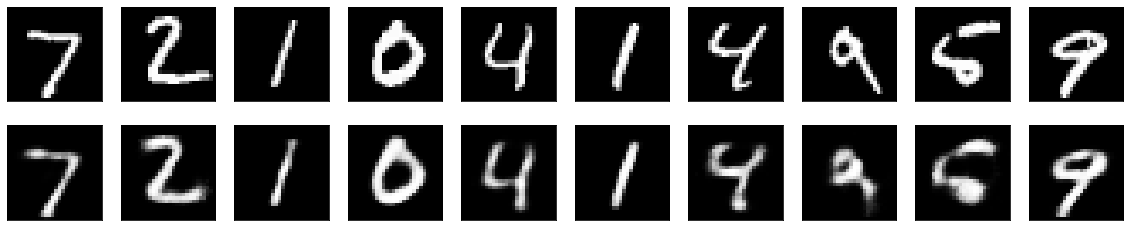

In [17]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()